# Importing Libraries

In [95]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re

# Loading data

In [96]:
data = pd.read_csv("spamSMS.csv")
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data visualization

In [97]:
data.shape

(5574, 2)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [99]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


Text(0, 0.5, 'Count')

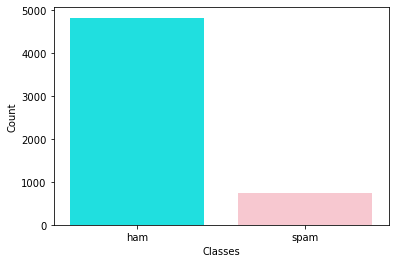

In [100]:
#Checking if the data is imbalanced or not
cols= ["#00FFFF", "#FFC0CB"] #colour palette
bar = sns.countplot(x= data["Class"], palette= cols)
bar.set_xlabel("Classes")
bar.set_ylabel("Count")

Hence, The data imbalance is quite evident here.

**FEATURE ENGINEERING**

**To explore and get to know data better I am creating more features(columns)**
- No_of_Char = Number of characters in the input text
- No_of_Word = Number of words in the input text
- No_of_sen  = Number of sentences in the input text

In [101]:
import nltk

In [102]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hashmithakatta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [104]:
data["No_of_Char"] = data["input Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["input Text"]), axis=1).apply(len)
data["No_of_sen"]=data.apply(lambda row: nltk.sent_tokenize(row["input Text"]), axis=1).apply(len)

In [105]:
data.head()

,Class,input Text,No_of_Char,No_of_Words,No_of_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


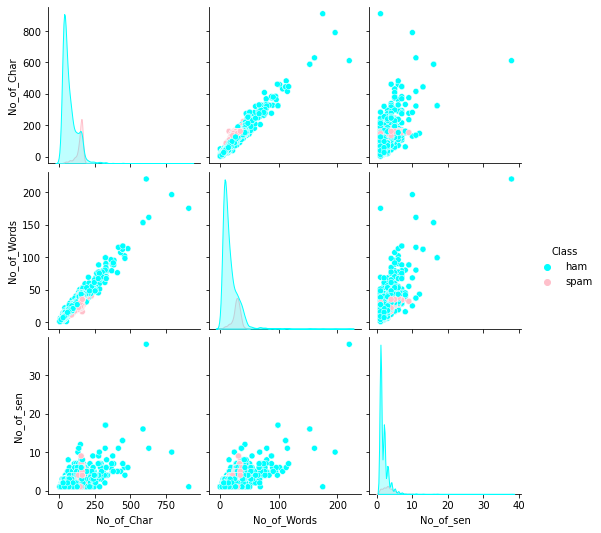

In [106]:
sns.pairplot(data=data, hue="Class",palette=cols)

Here, we can observe few outliners in the class 'Ham'. Hence, we can drop the outliners as they the same thing i.e length of the input text.